# Red bipartita de usuarios y palabras

In [46]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import operator
from scipy.stats import powerlaw
%matplotlib inline
sns.set()

## Número de nodos y enlaces

In [50]:
all_edges = []
all_edges_aux = []
with open('edges_file_total_network_weights_undirected_3.txt', encoding="utf8") as f:
    next(f)
    for line in f:
        edge = line.replace('\n','').split('\t')
        if (edge[0],edge[1]) in all_edges_aux:
            edge_index = all_edges_aux.index((edge[0],edge[1]))
            all_edges[edge_index] = (edge[0],edge[1],all_edges[edge_index][2] + 1)
        else:        
            all_edges.append((edge[0],edge[1],1))
            all_edges_aux.append((edge[0],edge[1]))

total_count_edges = len(all_edges)
all_nodes = set()
users_nodes = set()
words_nodes = set()

for x,y,w in all_edges:
    users_nodes.add(x)
    words_nodes.add(y)
    all_nodes.add(x)
    all_nodes.add(y)
    
print("Total de enlaces:", len(all_edges))
print("Total de nodos:", len(all_nodes))
print("Total de nodos usuario:", len(users_nodes))
print("Total de nodos de palabras:", len(words_nodes))

Total de enlaces: 27002
Total de nodos: 14709
Total de nodos usuario: 2969
Total de nodos de palabras: 11740


## Proyecciones

In [4]:
projection_users = set()
projection_words = set()
for word in words_nodes:
    possible_nodes = set()
    for edge in all_edges:
        if word in edge:
            possible_nodes.add(edge[0])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_users and (node2,node1) not in projection_users:
                projection_users.add((node1,node2)) if (node1 != node2) else 0
                
print("Paso por aqui")
                
for user in users_nodes:
    possible_nodes = set()
    for edge in all_edges:
        if user in edge:
            possible_nodes.add(edge[1])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_words and (node2,node1) not in projection_words:
                projection_words.add((node1,node2)) if (node1 != node2) else 0
                
print("Proyeccion usuarios total enlaces:",len(projection_users))
print("Proyeccion palabras total enlaces:",len(projection_words))

Paso por aqui
Proyeccion usuarios total enlaces: 233229
Proyeccion palabras total enlaces: 368074


## Proyecciones usando NetworkX

In [30]:
tweets_users_words_graph = nx.Graph()
tweets_users_words_graph.add_nodes_from(users_nodes, bipartite=0)
tweets_users_words_graph.add_nodes_from(words_nodes, bipartite=1)
tweets_users_words_graph.add_weighted_edges_from(all_edges)

def my_weight(G, u, v, weight='weight'):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G.edge[u][nbr].get(weight, 1) + G.edge[v][nbr].get(weight, 1)
    return w

projected_graph_users = bipartite.generic_weighted_projected_graph(tweets_users_words_graph, users_nodes, weight_function=my_weight)
projected_graph_words = bipartite.generic_weighted_projected_graph(tweets_users_words_graph, words_nodes, weight_function=my_weight)

print("Proyeccion grafo usuarios total enlaces:",projected_graph_users.edges(data=True)[0:10])
print("Proyeccion grafo palabras total enlaces:",projected_graph_words.edges(data=True)[0:10])
print("Proyeccion grafo usuarios total enlaces:",len(projected_graph_users.edges()))
print("Proyeccion grafo palabras total enlaces:",len(projected_graph_words.edges()))

# network_edges_file = open("file_name_test2.txt", 'w', encoding="utf8")
# print('Source\tTarget\tType', file=network_edges_file)
# for k in projected_graph_words.edges(data=True):
#     print(k, file=network_edges_file)
    

Proyeccion grafo usuarios total enlaces: [('161064030', '41001896', {'weight': 2}), ('161064030', '564100217', {'weight': 2}), ('161064030', '2428114045', {'weight': 3}), ('161064030', '706565063', {'weight': 4}), ('161064030', '2933222332', {'weight': 2}), ('161064030', '166768987', {'weight': 2}), ('161064030', '511950612', {'weight': 3}), ('161064030', '1614060590', {'weight': 2}), ('161064030', '2393164219', {'weight': 3}), ('161064030', '353877891', {'weight': 2})]
Proyeccion grafo palabras total enlaces: [('peruanos', 'violencia', {'weight': 2}), ('peruanos', 'familias', {'weight': 2}), ('peruanos', 'perú', {'weight': 2}), ('peruanos', 'sigan', {'weight': 2}), ('peruanos', '@panoramaptv', {'weight': 2}), ('canción', 'desilusión', {'weight': 4}), ('canción', 'mane', {'weight': 2}), ('canción', 'dedicarle', {'weight': 2}), ('canción', 'mueeeero', {'weight': 2}), ('canción', 'bella', {'weight': 2})]
Proyeccion grafo usuarios total enlaces: 233229
Proyeccion grafo palabras total enla

## Distribución de grados para la red bipartita completa

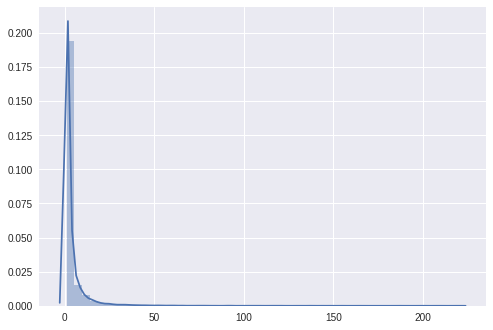

In [13]:
degrees_tweets_users_words_graph = list(tweets_users_words_graph.degree().values())
sns.distplot(degrees_tweets_users_words_graph)

## Distribución de grados para la red proyectada de usuarios

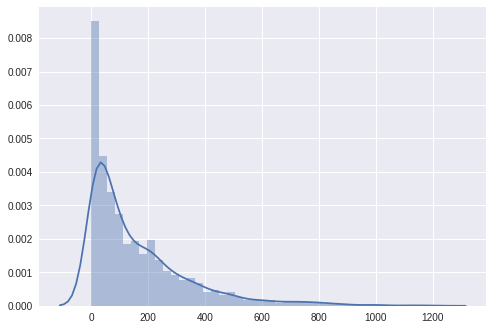

In [25]:
degrees_projected_graph_users = list(projected_graph_users.degree().values())
degrees_projected_graph_users = np.array(degrees_projected_graph_users)
degrees_projected_graph_users = degrees_projected_graph_users[np.nonzero(degrees_projected_graph_users)]
sns.distplot(degrees_projected_graph_users)

## Distribución de grados para la red proyectada de palabras

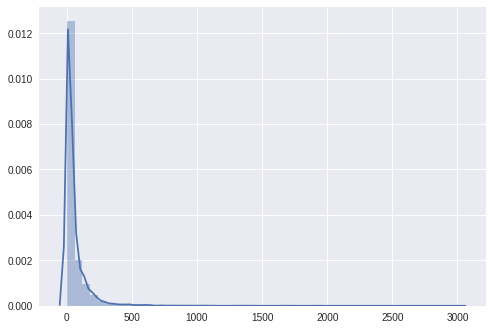

In [12]:
degrees_projected_graph_words = list(projected_graph_words.degree().values())
degrees_projected_graph_words = np.array(degrees_projected_graph_words)
degrees_projected_graph_words = degrees_projected_graph_words[np.nonzero(degrees_projected_graph_words)]
sns.distplot(degrees_projected_graph_words)

## Power Law Distribution para la red bipartita completa

(0.21386388445702345, 0.99999999999999989, 334.61121911679282)

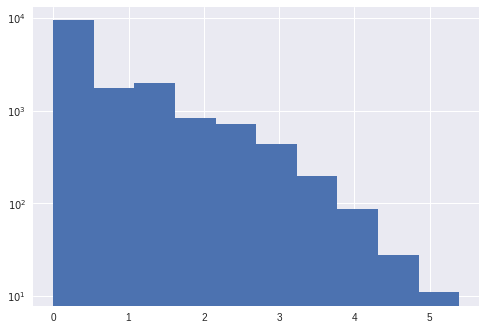

In [10]:
logs_tweets_users_words_graph = np.log(degrees_tweets_users_words_graph)
plt.hist(logs_tweets_users_words_graph, log=True)

e, l, s = powerlaw.fit(degrees_tweets_users_words_graph)
e, l, s

## Power Law Distribution para la red proyectada de usuarios

(0.30702380578395649, 0.99999999999999978, 1255.8748763112662)

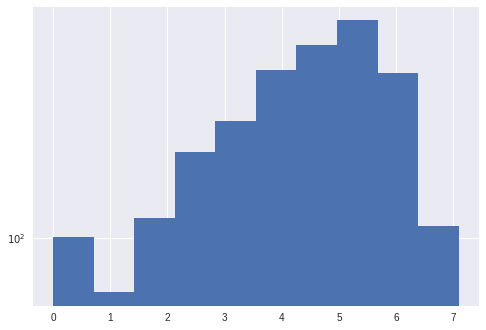

In [26]:
logs_projected_graph_users = np.log(degrees_projected_graph_users)
plt.hist(logs_projected_graph_users, log=True)

e_users, l_users, s_users = powerlaw.fit(degrees_projected_graph_users)
e_users, l_users, s_users

## Power Law Distribution para la red proyectada de palabras

(0.2088168415097742, 0.99999999999999989, 3872.6970439283318)

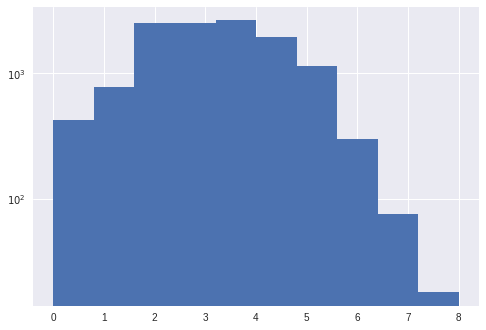

In [27]:
logs_projected_graph_words = np.log(degrees_projected_graph_words)
plt.hist(logs_projected_graph_words, log=True)

e_words, l_words, s_words = powerlaw.fit(degrees_projected_graph_words)
e_words, l_words, s_words

## Average path length de la red de palabras y usuarios y proyecciones

In [45]:
tweets_users_words_components = sorted(nx.connected_component_subgraphs(tweets_users_words_graph), key = len, reverse=True)
giant_component = tweets_users_words_components[0]
giant_component_edges = giant_component.edges()
degrees_giant_component = sorted(giant_component.degree().items(), key=operator.itemgetter(1), 
                                           reverse=True)[0:10]
degree_centrality_giant_component = sorted(nx.degree_centrality(giant_component).items(), key=operator.itemgetter(1), 
                                           reverse=True)[0:10]
print(degrees_giant_component)
print()
print(degree_centrality_giant_component)
# giant_component_diameter = nx.diameter(giant_component) #= 13
# giant_component_avg_shortest_path = nx.average_shortest_path_length(giant_component, weight='weight')
print("Componentes de la red de palabras y usuarios:",len(tweets_users_words_components))
print("Enlaces del componente gigante de la red de usuarios y palabras:", len(giant_component_edges))
print("Diametro del componente gigante de la red de usuarios y palabras:", giant_component_diameter)
print("Avg shortest path del componente gigante de la red de usuarios y palabras:", giant_component_avg_shortest_path)
print(" ")

# giant_component_edges_file = open('giant_component_edges_file.txt', 'w')
# print('Source\tTarget\tType', file=giant_component_edges_file)
# for k, v in sorted(giant_component_edges):
#     print(k+'\t'+v+'\tUndirected', file=giant_component_edges_file)
    

# print(nx.average_shortest_path_length(giant_component)) = 5.098959450209508
# for component in tweets_users_words_components:
#     print(len(component))

projected_graph_users_components = sorted(nx.connected_component_subgraphs(projected_graph_users), key = len, reverse=True)
print("Componentes de la proyección de usuarios:", len(projected_graph_users_components))
giant_component_users = projected_graph_users_components[0]
giant_component_users_edges = giant_component_users.edges()
# giant_component_users_avg_shortest_path = nx.average_shortest_path_length(giant_component_users, weight='weight')
# giant_component_users_diameter = nx.diameter(giant_component_users)
print("Enlaces del componente gigante de la red de usuarios:", len(giant_component_users_edges))
print("Diametro del componente gigante de la red de usuarios:", giant_component_users_diameter)
print("Avg shortest path del componente gigante de la red de usuarios:", giant_component_users_avg_shortest_path)
print(" ")


projected_graph_words_components = sorted(nx.connected_component_subgraphs(projected_graph_words), key = len, reverse=True)
print("Componentes de la proyección de palabras:", len(projected_graph_words_components))
giant_component_words = projected_graph_words_components[0]
giant_component_words_edges = giant_component_words.edges()

degrees_giant_component_words = sorted(giant_component_words.degree().items(), key=operator.itemgetter(1), reverse=True)
print("giant_component_words:",degrees_giant_component_words[0:10])
print(len(degrees_giant_component_words))
print(len(giant_component_words.nodes()))
# network_edges_file = open("file_name_test3.txt", 'w', encoding="utf8")
# # print('Source\tTarget\tType', file=network_edges_file)
# for k in degrees_giant_component_words:
#     print(k, file=network_edges_file)

# giant_component_words_avg_shortest_path = nx.average_shortest_path_length(giant_component_words, weight='weight')
# giant_component_words_diameter = nx.diameter(giant_component_words)
# print("Enlaces del componente gigante de la red de palabras:", len(giant_component_words_edges))
# print("Diametro del componente gigante de la red de palabras:", giant_component_words_diameter)
# print("Avg shortest path del componente gigante de la red de palabras:", giant_component_words_avg_shortest_path)

[('vida', 220), ('2696424289', 209), ('😂', 200), ('😍', 187), ('2939078896', 165), ('amor', 155), ('1218805825', 148), ('❤', 144), ('2835601896', 138), ('1470922604', 137)]

[('vida', 0.014717687985014717), ('2696424289', 0.013981803585763982), ('😂', 0.01337971635001338), ('😍', 0.01251003478726251), ('2939078896', 0.011038265988761039), ('amor', 0.010369280171260369), ('1218805825', 0.009900990099009901), ('❤', 0.009633395772009633), ('2835601896', 0.009232004281509231), ('1470922604', 0.009165105699759165)]
Componentes de la red de palabras y usuarios: 148
Enlaces del componente gigante de la red de usuarios y palabras: 28528
Diametro del componente gigante de la red de usuarios y palabras: 14
Avg shortest path del componente gigante de la red de usuarios y palabras: 5.644388127733482
 
Componentes de la proyección de usuarios: 148
Enlaces del componente gigante de la red de usuarios: 233227
Diametro del componente gigante de la red de usuarios: 6
Avg shortest path del componente gigan

## Coeficiente de Clustering

In [35]:
avg_clustering_tweets_users_words_graph = nx.average_clustering(tweets_users_words_graph)
print("Promedio del coeficiente de clustering de la red de usuarios y palabras:", avg_clustering_tweets_users_words_graph)

avg_clustering_projected_graph_users = nx.average_clustering(projected_graph_users)
print("Promedio del coeficiente de clustering de la red de usuarios:", avg_clustering_projected_graph_users)
N_users = len(projected_graph_users.nodes())
edges_user = projected_graph_users.edges()
p_users = (2*len(edges_user))/(N_users*(N_users-1))
random_graph_users = nx.gnp_random_graph(N_users,p_users)
avg_clustering_random_graph_users = nx.average_clustering(random_graph_users)
print("Promedio del coeficiente de clustering de la red aleatoria de usuarios:", avg_clustering_random_graph_users)

avg_clustering_projected_graph_words = nx.average_clustering(projected_graph_words)
print("Promedio del coeficiente de clustering de la red de palabras:", avg_clustering_projected_graph_words)
N_words = len(projected_graph_words.nodes())
edges_words = projected_graph_words.edges()
p_words = (2*len(edges_words))/(N_words*(N_words-1))
random_graph_words = nx.gnp_random_graph(N_words,p_words)
avg_clustering_random_graph_words = nx.average_clustering(random_graph_words)
print("Promedio del coeficiente de clustering de la red aleatoria de palabras:", avg_clustering_random_graph_words)

Promedio del coeficiente de clustering de la red de usuarios y palabras: 0.0
Promedio del coeficiente de clustering de la red de usuarios: 0.5772418901565632
Promedio del coeficiente de clustering de la red aleatoria de usuarios: 0.05742917398388801
Promedio del coeficiente de clustering de la red de palabras: 0.8540640763704914
Promedio del coeficiente de clustering de la red aleatoria de palabras: 0.005556848386865481


## K-cores palabras y usuarios

In [43]:
giant_component_words_k_cores = nx.k_core(giant_component_words)
print(len(giant_component_words_k_cores.edges()))
nx.write_gexf(giant_component_words_k_cores, "giant_component_words_k_cores.gexf")

35511


## Archivos con las redes

In [39]:
def export_network_file(network_edges, file_name):
    network_edges_file = open(file_name, 'w')
    print('Source\tTarget\tType', file=network_edges_file)
    for k, v in sorted(network_edges):
        print(k+'\t'+v+'\tUndirected', file=network_edges_file)

export_network_file(giant_component_users_edges, 'giant_component_users_edges_file.txt')
export_network_file(giant_component_words_edges, 'giant_component_words_edges_file.txt')